In [96]:
import pandas as pd
import numpy as np
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [68]:
df = pd.read_csv('train.csv')
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [32]:
df.shape

(20758, 18)

In [33]:
print(df.isnull().sum())

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [34]:
print(len(df)-len(df.drop_duplicates()))

0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [36]:
print("Gender",df["Gender"].unique())
print("family_history_with_overweight",df["family_history_with_overweight"].unique())
print("FAVC",df["FAVC"].unique())
print("CAEC",df["CAEC"].unique())
print("SMOKE",df["SMOKE"].unique())
print("SCC",df["SCC"].unique())
print("CALC",df["CALC"].unique())
print("MTRANS",df["MTRANS"].unique())
print("NObeyesdad",df["NObeyesdad"].unique())

Gender ['Male' 'Female']
family_history_with_overweight ['yes' 'no']
FAVC ['yes' 'no']
CAEC ['Sometimes' 'Frequently' 'no' 'Always']
SMOKE ['no' 'yes']
SCC ['no' 'yes']
CALC ['Sometimes' 'no' 'Frequently']
MTRANS ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
NObeyesdad ['Overweight_Level_II' 'Normal_Weight' 'Insufficient_Weight'
 'Obesity_Type_III' 'Obesity_Type_II' 'Overweight_Level_I'
 'Obesity_Type_I']


In [62]:
y=df.pop("NObeyesdad")
x = df.copy()
x


,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile


In [63]:
x = pd.get_dummies(x,drop_first=True,dtype=int)
x.head()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,1,...,1,0,0,0,1,0,0,0,1,0
1,1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,0,...,0,0,0,0,0,1,0,0,0,0
2,2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,0,...,1,0,0,0,0,1,0,0,1,0
3,3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,0,...,1,0,0,0,1,0,0,0,1,0
4,4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,1,...,1,0,0,0,1,0,0,0,1,0


In [98]:
encoder = LabelEncoder()
y=encoder.fit_transform(y)

<Figure size 5000x4000 with 0 Axes>

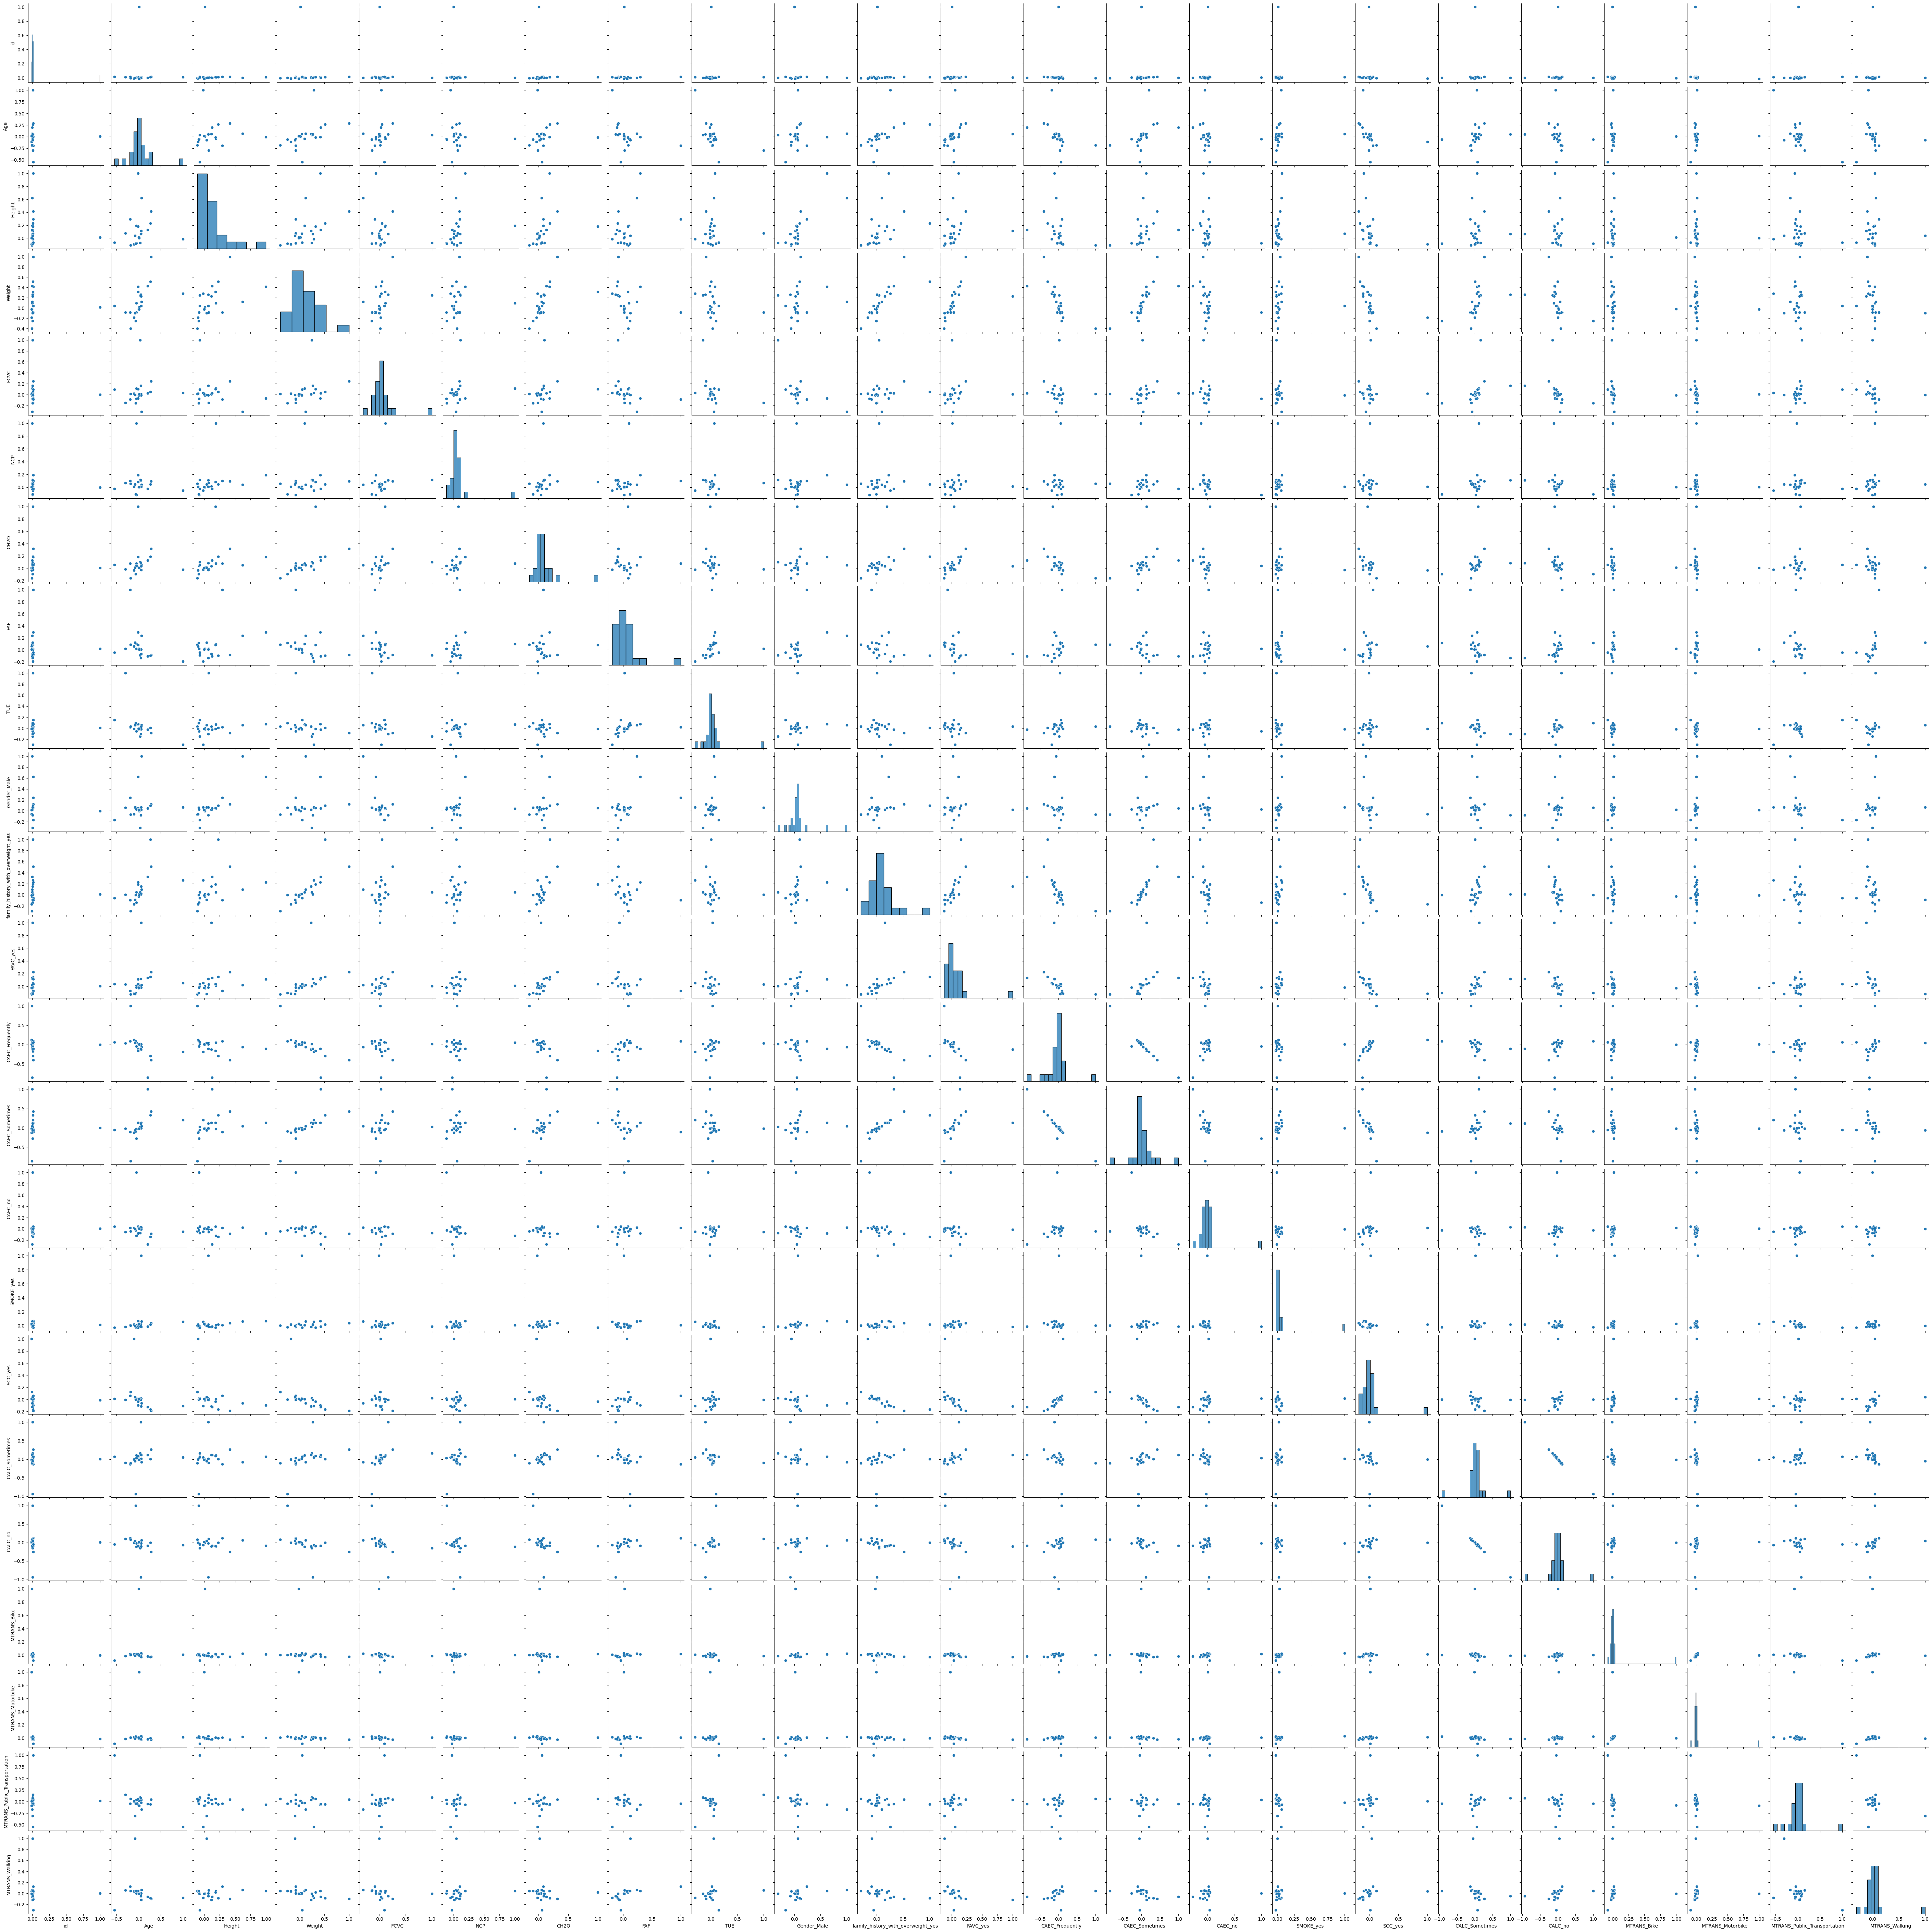

In [73]:
plt.figure(figsize=(50,40))
g = sns.pairplot(x.corr())

In [72]:
x.corr()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_Sometimes,CAEC_no,SMOKE_yes,SCC_yes,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
id,1.000000,0.007634,0.012041,0.014020,0.002098,-0.000332,0.007917,0.016719,0.007667,-0.000923,...,0.001005,0.005160,0.011544,-0.011162,0.002654,0.002141,-0.004036,-0.012429,0.012802,0.002244
Age,0.007634,1.000000,-0.011713,0.283381,0.034414,-0.048479,-0.016325,-0.192259,-0.296154,0.066530,...,0.201389,-0.051281,0.056006,-0.108855,0.049159,-0.063896,0.006393,0.013754,-0.545798,-0.078640
Height,0.012041,-0.011713,1.000000,0.416677,-0.071546,0.191383,0.183706,0.295278,0.076433,0.623507,...,0.128341,-0.078078,0.069748,-0.095923,0.067710,-0.083777,0.013701,0.002375,-0.068578,0.040525
Weight,0.014020,0.283381,0.416677,1.000000,0.245682,0.095947,0.317914,-0.084845,-0.086471,0.118613,...,0.426569,-0.083220,0.040416,-0.185116,0.263987,-0.254933,-0.021761,-0.023137,0.043695,-0.099298
FCVC,0.002098,0.034414,-0.071546,0.245682,1.000000,0.113349,0.101299,-0.089822,-0.147843,-0.312766,...,0.022390,-0.075708,-0.012191,0.022120,0.162723,-0.154531,-0.012134,0.006724,0.093360,-0.006344
NCP,-0.000332,-0.048479,0.191383,0.095947,0.113349,1.000000,0.080949,0.100871,0.067459,0.039468,...,-0.023038,-0.119536,0.006820,0.006633,0.107963,-0.110182,0.002850,0.004866,-0.024884,0.045570
CH2O,0.007917,-0.016325,0.183706,0.317914,0.101299,0.080949,1.000000,0.082932,-0.010654,0.053298,...,0.131811,0.043255,-0.023475,-0.031720,0.088611,-0.091054,0.016424,0.007257,0.059524,0.015921
FAF,0.016719,-0.192259,0.295278,-0.084845,-0.089822,0.100871,0.082932,1.000000,0.021213,0.238399,...,-0.105593,0.019082,0.008374,0.061828,-0.132248,0.117593,0.019898,0.007884,-0.043105,0.121534
TUE,0.007667,-0.296154,0.076433,-0.086471,-0.147843,0.067459,-0.010654,0.021213,1.000000,0.058696,...,-0.020049,-0.053714,-0.016093,-0.007917,-0.100145,0.095392,-0.013738,-0.012932,0.150641,0.055565
Gender_Male,-0.000923,0.066530,0.623507,0.118613,-0.312766,0.039468,0.053298,0.238399,0.058696,1.000000,...,0.046738,0.025167,0.063349,-0.061442,-0.078786,0.061115,0.022265,0.015955,-0.168146,0.062676


In [99]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [100]:
n_estimators = [int(x) for x in np.linspace(100,1200,12)]
max_features = ['sqrt','auto']
max_depth = [int(x) for x in np.linspace(5,30,6)]
min_samples_split = [2,5,10,50,100]
min_samples_leaf = [1,2,5,8,10]

In [101]:
regressor = RandomForestRegressor()

In [102]:
grid = {'n_estimators':n_estimators,
'max_features':max_features,
'max_depth':max_depth,
'min_samples_split':min_samples_split,
'min_samples_split':min_samples_leaf}

In [103]:
search = RandomizedSearchCV(estimator=regressor,param_distributions=grid,n_iter=10,cv=5,verbose=2,n_jobs=1,random_state=42)

In [104]:
search.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=auto, min_samples_split=8, n_estimators=500; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_split=8, n_estimators=500; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_split=8, n_estimators=500; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_split=8, n_estimators=500; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_split=8, n_estimators=500; total time=   0.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_split=10, n_estimators=300; total time=   9.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_split=10, n_estimators=300; total time=   7.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_split=10, n_estimators=300; total time=   7.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_split=10, n_estimators=300; total time=   7.2s
[CV] END max_depth=15, max_features

c:\Become_Datascientist\Multi-Class-Prediction-of-Obesity-Risk\venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Become_Datascientist\Multi-Class-Prediction-of-Obesity-Risk\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Become_Datascientist\Multi-Class-Prediction-of-Obesity-Risk\venv\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Become_Datascientist\Multi-Class-Prediction-of

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'auto'],
                                        'min_samples_split': [1, 2, 5, 8, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [105]:
search.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 20}

In [106]:
y_pred = search.predict(x_test)

In [110]:
y_pred = [int(x) for x in y_pred]

In [111]:
y_pred

[3,
 3,
 2,
 2,
 0,
 0,
 3,
 3,
 3,
 3,
 0,
 0,
 2,
 0,
 5,
 3,
 4,
 3,
 5,
 1,
 3,
 2,
 3,
 3,
 3,
 0,
 3,
 0,
 0,
 1,
 1,
 4,
 0,
 3,
 2,
 2,
 3,
 0,
 2,
 3,
 3,
 3,
 2,
 2,
 3,
 3,
 3,
 0,
 3,
 5,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 4,
 3,
 0,
 0,
 3,
 5,
 3,
 3,
 5,
 3,
 2,
 2,
 0,
 3,
 3,
 3,
 1,
 4,
 1,
 3,
 2,
 3,
 2,
 3,
 2,
 1,
 3,
 5,
 0,
 2,
 1,
 3,
 3,
 0,
 3,
 4,
 2,
 3,
 3,
 3,
 3,
 2,
 3,
 2,
 0,
 4,
 2,
 3,
 2,
 4,
 2,
 0,
 3,
 2,
 3,
 3,
 4,
 5,
 3,
 3,
 3,
 0,
 2,
 3,
 3,
 2,
 0,
 3,
 0,
 2,
 3,
 4,
 2,
 4,
 0,
 3,
 0,
 4,
 5,
 1,
 3,
 1,
 0,
 4,
 0,
 3,
 2,
 3,
 2,
 2,
 2,
 4,
 4,
 3,
 0,
 3,
 3,
 3,
 4,
 2,
 4,
 0,
 1,
 0,
 2,
 0,
 2,
 2,
 3,
 2,
 3,
 0,
 0,
 2,
 5,
 5,
 2,
 4,
 1,
 2,
 0,
 0,
 3,
 3,
 2,
 2,
 2,
 2,
 5,
 4,
 2,
 4,
 0,
 4,
 4,
 3,
 1,
 4,
 2,
 4,
 3,
 3,
 2,
 0,
 1,
 2,
 3,
 4,
 4,
 3,
 4,
 2,
 2,
 5,
 1,
 3,
 1,
 1,
 2,
 3,
 1,
 2,
 3,
 3,
 4,
 4,
 2,
 3,
 3,
 3,
 0,
 3,
 0,
 3,
 3,
 3,
 0,
 3,
 3,
 3,
 2,
 4,
 2,
 1,
 3,
 1,
 3,
 1,
 1,
 3,
 0,


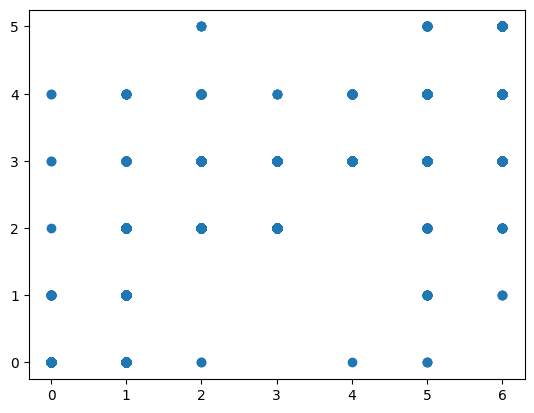

In [113]:
plt.scatter(y_test,y_pred)

C:\Users\ravee\AppData\Local\Temp\ipykernel_17492\520176394.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


<Axes: ylabel='Density'>

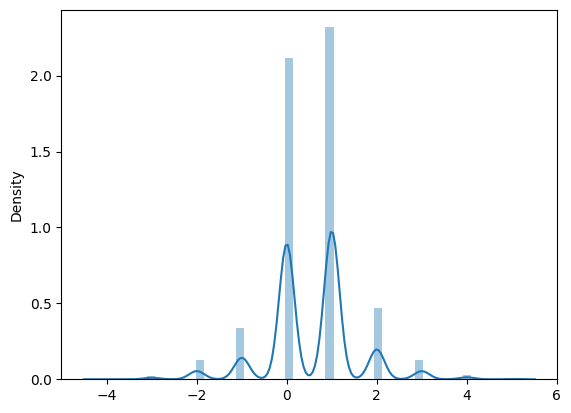

In [116]:
sns.distplot(y_test-y_pred)